# Bank account churn prediction

## Modeling

In [1]:
# import necessary libraries and modules
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [20, 8]
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, ShuffleSplit, cross_validate
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier

In [2]:
# import previously saved dataset after exploratory data analysis and convert to a dataframe
df = pd.read_csv('cleaned_data.csv', index_col=0)
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Female,Male,France,Germany,Spain,Exited
RowNumber,,,,,,,,,,,,,,
1,619,42,2,0.00,1,1,1,101348.88,1,0,1,0,0,1
2,608,41,1,83807.86,1,0,1,112542.58,1,0,0,0,1,0
3,502,42,8,159660.80,3,1,0,113931.57,1,0,1,0,0,1
4,699,39,1,0.00,2,0,0,93826.63,1,0,1,0,0,0
5,850,43,2,125510.82,1,1,1,79084.10,1,0,0,0,1,0


In [3]:
# set target and create dataframe of features
target = df.Exited
X = df.drop('Exited', 1)
X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Female,Male,France,Germany,Spain
RowNumber,,,,,,,,,,,,,
1,619,42,2,0.00,1,1,1,101348.88,1,0,1,0,0
2,608,41,1,83807.86,1,0,1,112542.58,1,0,0,0,1
3,502,42,8,159660.80,3,1,0,113931.57,1,0,1,0,0
4,699,39,1,0.00,2,0,0,93826.63,1,0,1,0,0
5,850,43,2,125510.82,1,1,1,79084.10,1,0,0,0,1


In [4]:
# initialize scaler and several candidate classifier models
scaler = StandardScaler()
classifiers = [
    LogisticRegression(),
    KNeighborsClassifier(n_neighbors=4),
    SVC(),
    GaussianNB(),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=6),
    AdaBoostClassifier(),
]

# set number of random samplings and train/test split
split = 10
test_pct = 0.5

In [5]:
# loop through models, take random samples, scale, train, score, and output relevant information
print('Number of random splits:', split)
print('-----------------------')
for i in classifiers:
    clf = i
    cv = ShuffleSplit(n_splits=split, test_size=test_pct, random_state=47)
    train_scores = []
    test_scores = []
    pred = []
    for train_index, test_index in cv.split(X):
        X_train = X.iloc[train_index]
        X_test = X.iloc[test_index]
        y_train = target.iloc[train_index]
        y_test = target.iloc[test_index]
        scaler.fit_transform(X_train)
        scaler.transform(X_test)
        clf.fit(X_train, y_train)
        train_scores.append(clf.score(X_train, y_train))
        test_scores.append(clf.score(X_test, y_test))
    print('Classifier:', clf)
    print('Train/test split percentage: '+str(int(100*(1-test_pct)))+'/'+str(int(100*test_pct)))
    print('Average train accuracy: '+str(round(100*np.mean(train_scores), 2))+'%')
    print('Average test accuracy: '+str(round(100*np.mean(test_scores), 2))+'%')
    print('Variance in train scores:', np.var(train_scores))
    print('Variance in test scores:', np.var(test_scores))
    if i == classifiers[-1]:
        break
    print('\n')

Number of random splits: 10
-----------------------
Classifier: LogisticRegression()
Train/test split percentage: 50/50
Average train accuracy: 79.05%
Average test accuracy: 79.1%
Variance in train scores: 1.016039999999998e-05
Variance in test scores: 1.892639999999997e-05


Classifier: KNeighborsClassifier(n_neighbors=4)
Train/test split percentage: 50/50
Average train accuracy: 81.55%
Average test accuracy: 78.03%
Variance in train scores: 1.414440000000003e-05
Variance in test scores: 8.72960000000005e-06


Classifier: SVC()
Train/test split percentage: 50/50
Average train accuracy: 79.59%
Average test accuracy: 79.67%
Variance in train scores: 8.617999999999945e-06
Variance in test scores: 8.618000000000096e-06


Classifier: GaussianNB()
Train/test split percentage: 50/50
Average train accuracy: 78.55%
Average test accuracy: 78.53%
Variance in train scores: 3.3860000000000024e-06
Variance in test scores: 1.559359999999992e-05


Classifier: DecisionTreeClassifier(max_depth=5)
Train

# Final Models

In [6]:
# set train and test sets for final models
X_train, X_test, y_train, y_test = train_test_split(X, target, test_size=test_pct, random_state=47)
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# initialize final models
models = [
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=7),
    AdaBoostClassifier(),
    LogisticRegression(),
]

## Decision Tree

Train score 0.8584
Test score 0.8546


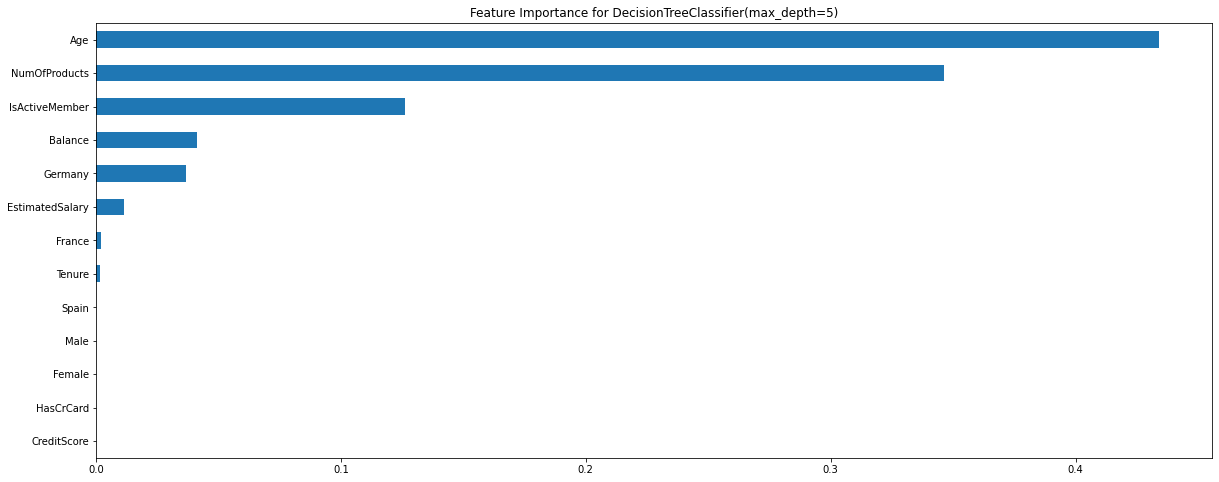

In [7]:
# fit model, save and output scores, make and display confusion matrix, save feature importance information
model = models[0]
model.fit(X_train, y_train)
pred = pd.Series(model.predict(X_test))
train_score = model.score(X_train, y_train)
test_score = model.score(X_test, y_test)
mat = confusion_matrix(y_test, pred)
confusion = pd.DataFrame(mat)
confusion.columns = ['Predicted non-churner', 'Predicted churner']
confusion.index = ['True non-churner', 'True churner']
importance = pd.Series(model.feature_importances_, index=X.columns).sort_values()
importance.plot(kind = "barh")
plt.title('Feature Importance for '+str(model))
print('Train score', train_score)
print('Test score', test_score)

Text(0.5, 1.0, 'Confusion matrix for DecisionTreeClassifier(max_depth=5)')

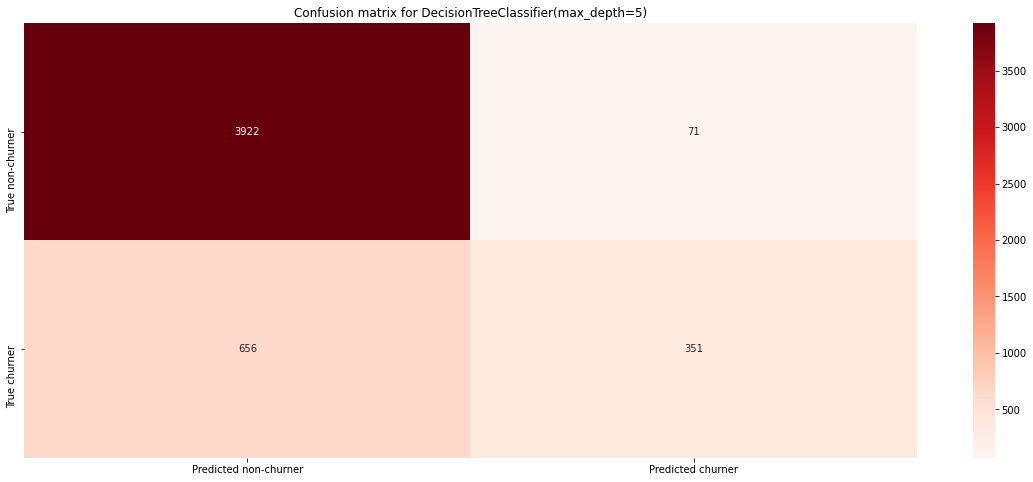

In [8]:
# display confusion matrix
sns.heatmap(confusion, annot=True, cmap='Reds', fmt='g')
plt.title('Confusion matrix for '+str(model))

## Random Forest

Train score 0.8758
Test score 0.8586


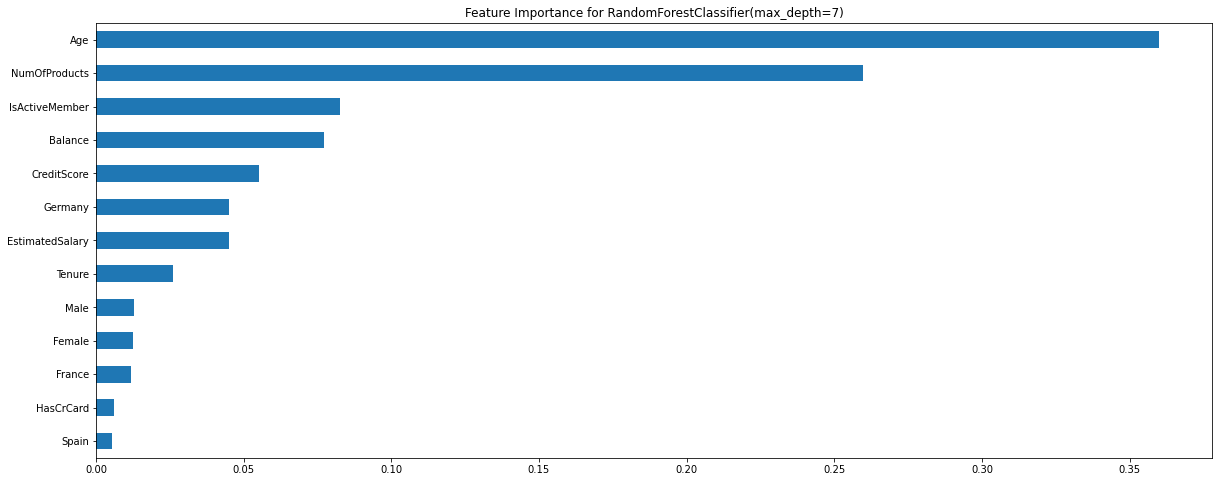

In [9]:
# fit model, save and output scores, make and display confusion matrix, save feature importance information
model = models[1]
model.fit(X_train, y_train)
pred = pd.Series(model.predict(X_test))
train_score = model.score(X_train, y_train)
test_score = model.score(X_test, y_test)
mat = confusion_matrix(y_test, pred)
confusion = pd.DataFrame(mat)
confusion.columns = ['Predicted non-churner', 'Predicted churner']
confusion.index = ['True non-churner', 'True churner']
importance = pd.Series(model.feature_importances_, index=X.columns).sort_values()
importance.plot(kind = "barh")
plt.title('Feature Importance for '+str(model))
print('Train score', train_score)
print('Test score', test_score)

Text(0.5, 1.0, 'Confusion matrix for RandomForestClassifier(max_depth=7)')

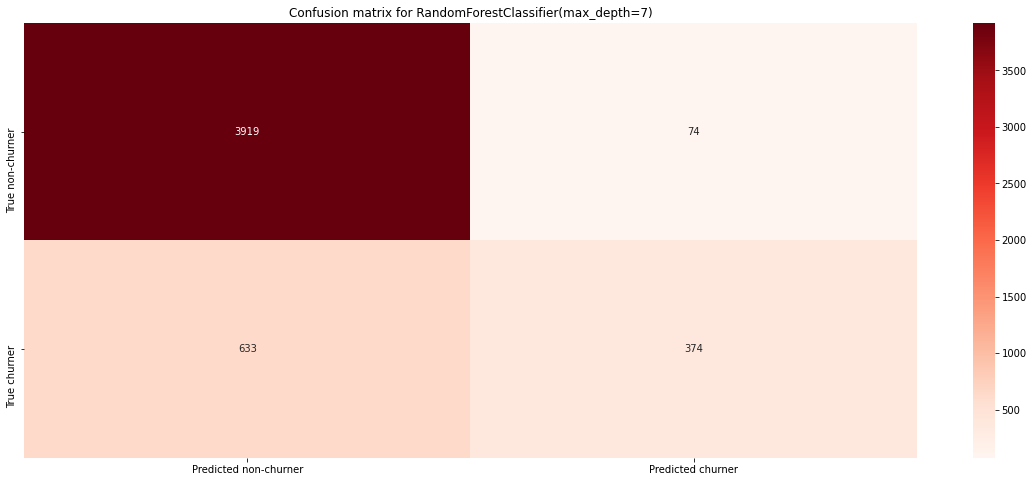

In [10]:
# display confusion matrix
sns.heatmap(confusion, annot=True, cmap='Reds', fmt='g')
plt.title('Confusion matrix for '+str(model))

## AdaBoost

Train score 0.8608
Test score 0.8474


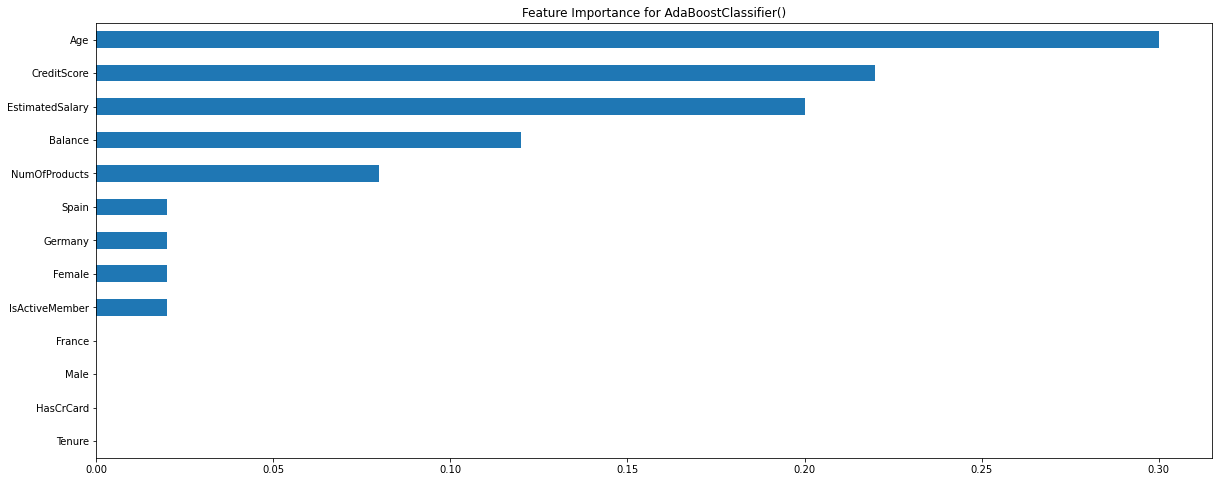

In [11]:
# fit model, save and output scores, make and display confusion matrix, save feature importance information
model = models[2]
model.fit(X_train, y_train)
pred = pd.Series(model.predict(X_test))
train_score = model.score(X_train, y_train)
test_score = model.score(X_test, y_test)
mat = confusion_matrix(y_test, pred)
confusion = pd.DataFrame(mat)
confusion.columns = ['Predicted non-churner', 'Predicted churner']
confusion.index = ['True non-churner', 'True churner']
importance = pd.Series(model.feature_importances_, index=X.columns).sort_values()
importance.plot(kind = "barh")
plt.title('Feature Importance for '+str(model))
print('Train score', train_score)
print('Test score', test_score)

Text(0.5, 1.0, 'Confusion matrix for AdaBoostClassifier()')

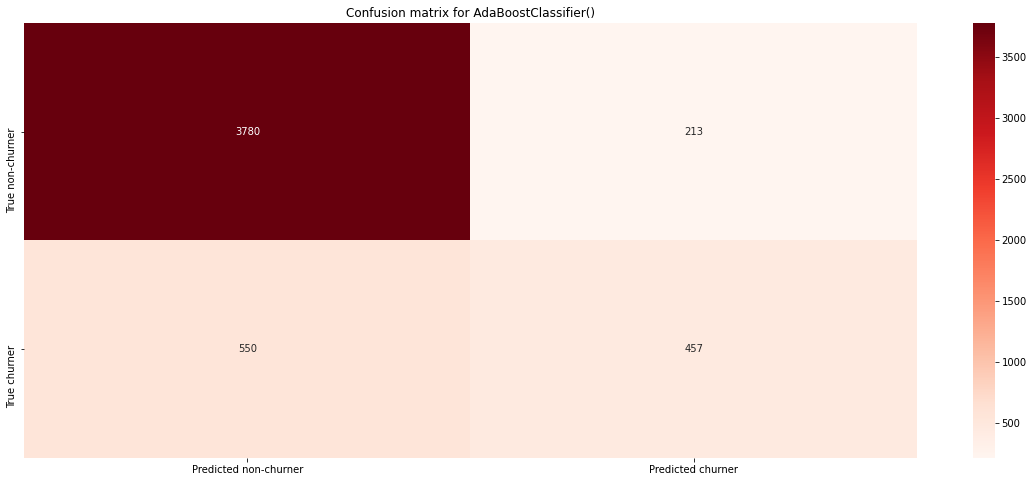

In [12]:
# display confusion matrix
sns.heatmap(confusion, annot=True, cmap='Reds', fmt='g')
plt.title('Confusion matrix for '+str(model))

# Baseline Comparison - Logistic Regression

Text(0.5, 1.0, 'Feature Importance for LogisticRegression()')

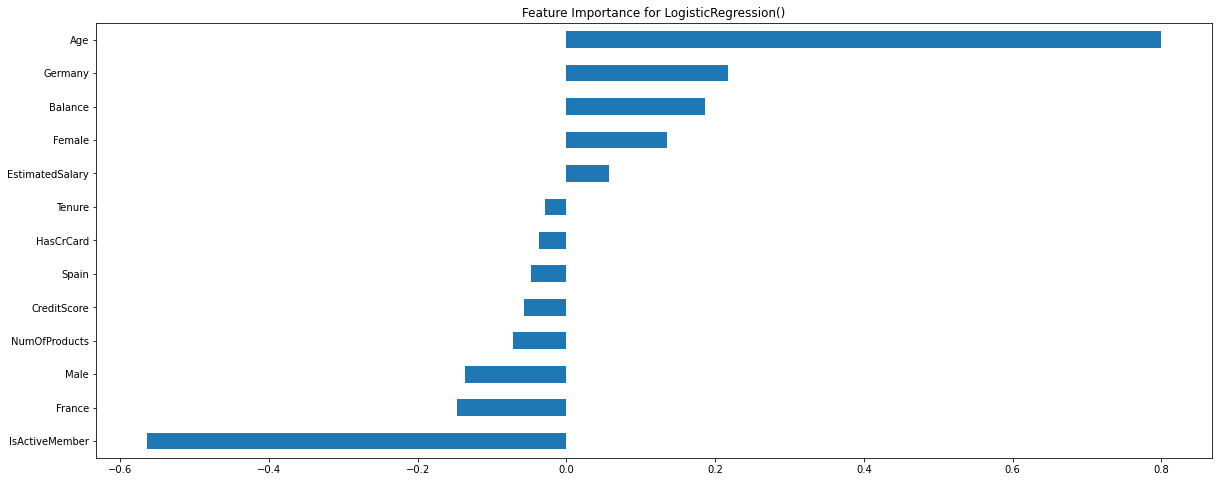

In [13]:
# fit model, save and output scores, make and display confusion matrix, save feature importance information
model = models[3]
model.fit(X_train, y_train)
pred = pd.Series(model.predict(X_test))
train_score = model.score(X_train, y_train)
test_score = model.score(X_test, y_test)
mat = confusion_matrix(y_test, pred)
confusion = pd.DataFrame(mat)
confusion.columns = ['Predicted non-churner', 'Predicted churner']
confusion.index = ['True non-churner', 'True churner']
importance = pd.Series(model.coef_[0][:], index=X.columns).sort_values()
importance.plot(kind = "barh")
plt.title('Feature Importance for '+str(model))

Text(0.5, 1.0, 'Confusion matrix for LogisticRegression()')

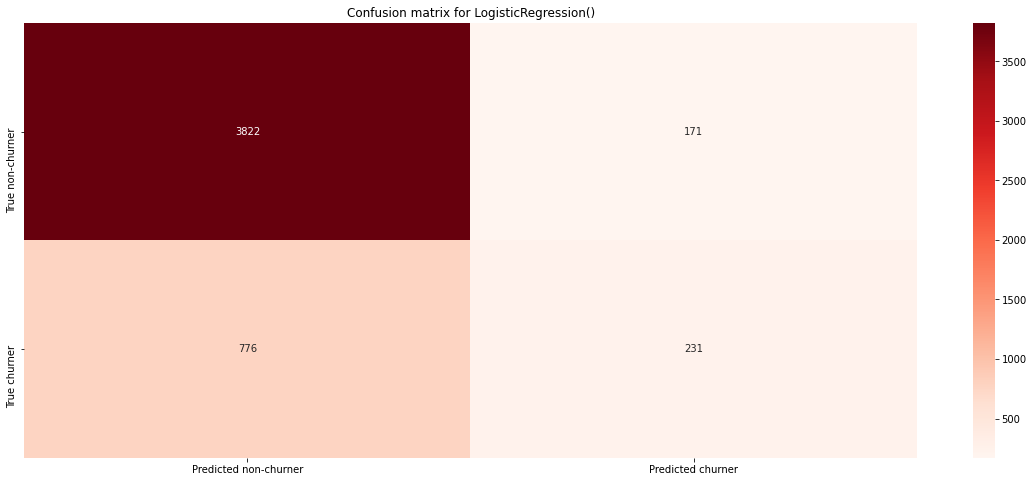

In [14]:
# display confusion matrix
sns.heatmap(confusion, annot=True, cmap='Reds', fmt='g')
plt.title('Confusion matrix for '+str(model))